# Plot MMD distances in feature space

In [1]:
WORKDIR = "/home/wustl/Dummy/Wustl/Deepfake/MasterThesis"  # specify WORKDIR here

In [2]:
from paper_utils import get_figsize, configure_matplotlib, create_subplot_mosaic
from calculate_MMD import get_files_from_directory
import matplotlib.pyplot as plt
import numpy as np

In [3]:
configure_matplotlib(
    rc={
        "xtick.labelbottom": False,
        "xtick.bottom": True,
        "xtick.labeltop": True,
        "ytick.left": True,
        "ytick.right": False,
        "figure.constrained_layout.use": False,
        "savefig.pad_inches": 0.01,
    }
)

In [50]:
## Plot Fake vs Real Seperation Evulotion

In [11]:
import pickle 
import os 
experiemnts = {}
path_names = []
base_input_folder = "/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features"
mmds = get_files_from_directory(base_input_folder)
print(mmds.keys())
mmd = mmds["fake_vs_real"]
print(mmd)
for file in  mmd:
    
    with open(file, "rb") as input_file:
        mmds_GANs = pickle.load(input_file)
    experiemnt_name = file.split("/")[-1]
    experiemnts[experiemnt_name] = mmds_GANs
print(experiemnts.keys())

dict_keys(['filter_vs_filter', 'no_filter_vs_filter', 'fake_vs_real', 'real_vs_fake'])
['/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/fake_vs_real/butt_band_5_sup_con.pkl', '/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/fake_vs_real/butt_high_5_sup_con.pkl', '/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/fake_vs_real/supContrastive.pkl', '/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/fake_vs_real/butt_low_5_sup_con.pkl']
dict_keys(['butt_band_5_sup_con.pkl', 'butt_high_5_sup_con.pkl', 'supContrastive.pkl', 'butt_low_5_sup_con.pkl'])


OpenClip ADM Linear [0.03386878967285156, 0.0045784711837768555, 0.004225254058837891, 0.01443636417388916, 0.0157926082611084, 0.004312276840209961, 0.00455164909362793, 0.02032458782196045, 0.020525336265563965, 0.02065718173980713, 0.004818439483642578, 0.025752782821655273, 0.031129956245422363, 0.004296302795410156, 0.05497598648071289, 0.09535598754882812, 0.16946077346801758, 0.358217716217041, 0.6193611025810242]
OpenClip ADM Encoder [0.01692521572113037, 0.005680084228515625, 0.005707859992980957, 0.011500000953674316, 0.012593388557434082, 0.00579226016998291, 0.015943408012390137, 0.018743515014648438, 0.022405385971069336, 0.026806950569152832, 0.00531768798828125, 0.04409503936767578, 0.057573556900024414, 0.0049800872802734375, 0.10739612579345703, 0.16556012630462646, 0.22513854503631592, 0.33483779430389404, 0.39927518367767334]
OpenClip DDPM Linear [0.017154455184936523, 0.008208155632019043, 0.007573485374450684, 0.007464408874511719, 0.0076705217361450195, 0.00763618

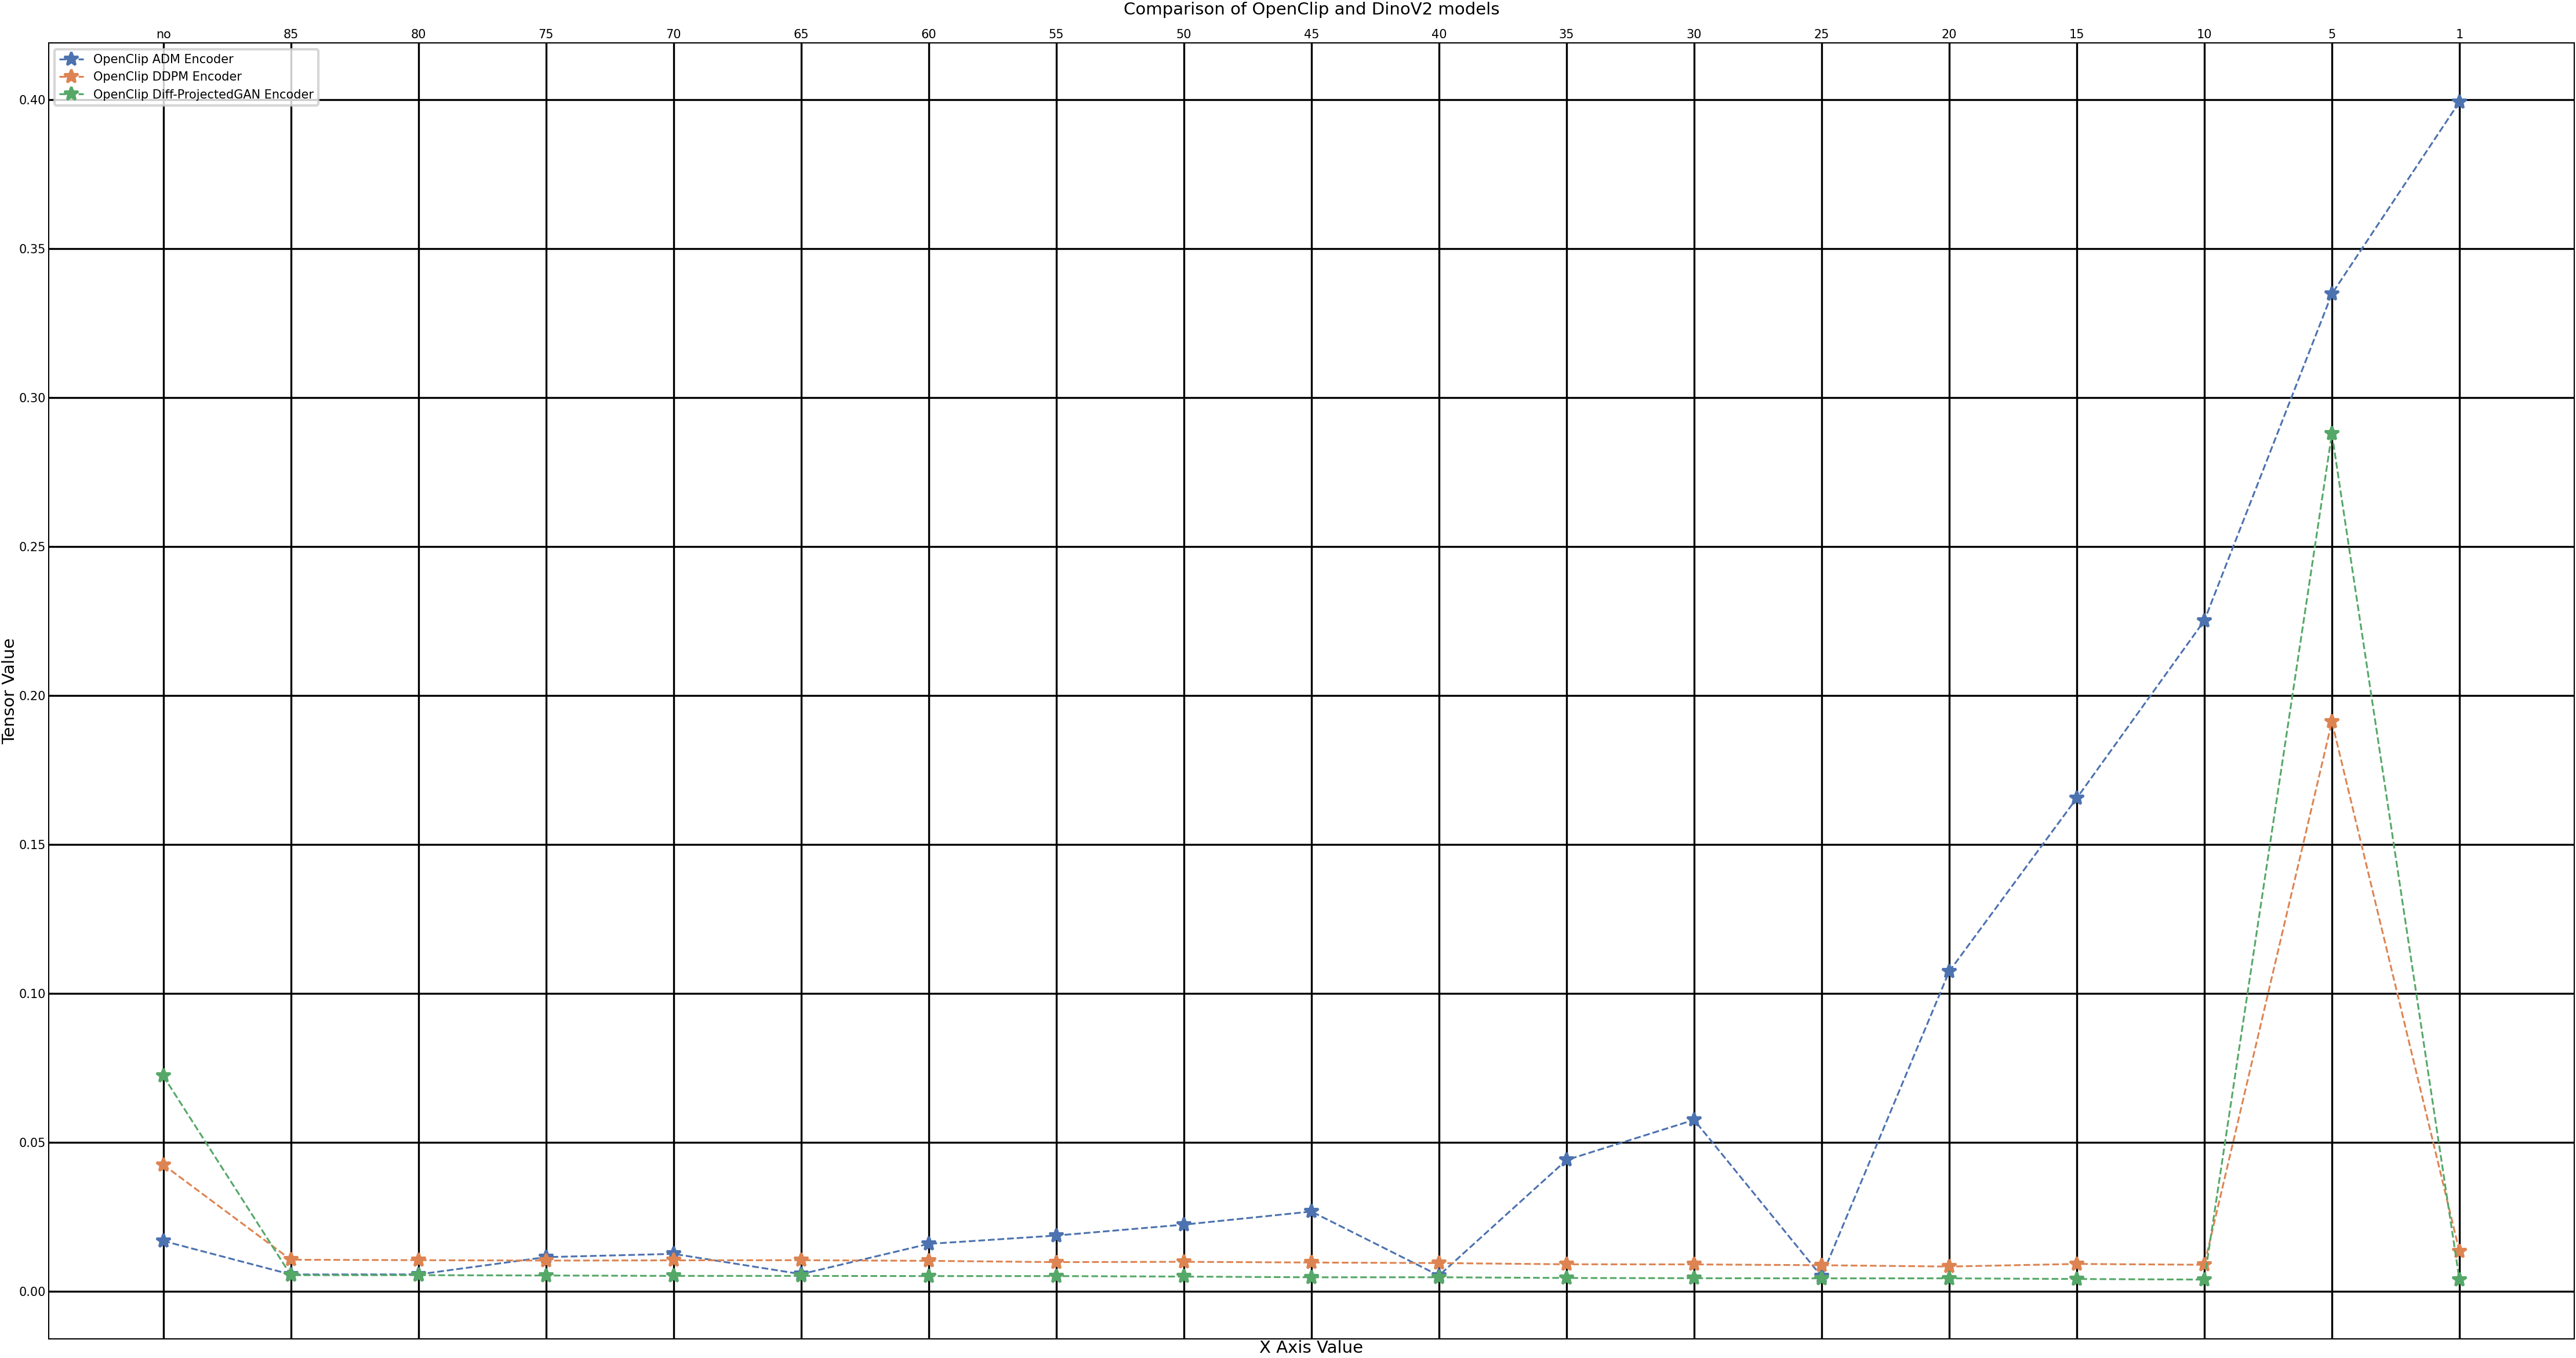

In [5]:
# Sorting function for x_labels
data = experiemnts["butt_low_5_sup_con.pkl"]

def custom_sort(val):
    return int(val) if val != "no" else 100  # Assigning a high value to "no" to make it appear first

# Plotting
plt.figure(figsize=(15, 8))

x_labels = sorted(data['OpenClip']["DDPM"].keys(), key=custom_sort, reverse=True)

for model, metric_data in data.items():
    for metric, values in metric_data.items():
        linear_vals = [values[key]['linear.pt'].item() for key in x_labels]
        encoder_vals = [values[key]['encoder.pt'].item() for key in x_labels]

        #plt.plot(x_labels, linear_vals, '-o', label=f'{model} {metric} Linear')
        plt.plot(x_labels, encoder_vals, '--*', label=f'{model} {metric} Encoder')

        print(f'{model} {metric} Linear', linear_vals)
        print(f'{model} {metric} Encoder', encoder_vals)

plt.title('Comparison of OpenClip and DinoV2 models')
plt.xlabel('X Axis Value')
plt.ylabel('Tensor Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# # Sorting function for x_labels
# data = experiemnts["butt_band_5_sup_con.pkl"]
# def custom_sort(val):
#     return int(val) if val != "no" else 100  # Assigning a high value to "no" to make it appear first

# # Plotting
# plt.figure(figsize=(15, 8))

# x_labels = sorted(data['OpenClip'].keys(), key=custom_sort)

# for model, values in data.items():
#     print(model)
#     linear_vals = [values[key]['linear.pt'].item() for key in x_labels]
#     encoder_vals = [values[key]['encoder.pt'].item() for key in x_labels]

#     plt.plot(x_labels, linear_vals, '-o', label=f'{model} Linear')
#     plt.plot(x_labels, encoder_vals, '--*', label=f'{model} Encoder')

# plt.title('Comparison of OpenClip and DinoV2 models')
# plt.xlabel('X Axis Value')
# plt.ylabel('Tensor Value')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
plt.show()

In [7]:
# Sorting function for x_labels
data = experiemnts["butt_high_5_sup_con.pkl"]
def custom_sort(val):
    return int(val) if val != "no" else 0  # Assigning a high value to "no" to make it appear first

# Plotting
plt.figure(figsize=(15, 8))

x_labels = sorted(data['OpenClip'].keys(), key=custom_sort)

for model, values in data.items():
    print(model)
    linear_vals = [values[key]['linear.pt'].item() for key in x_labels]
    encoder_vals = [values[key]['encoder.pt'].item() for key in x_labels]

    plt.plot(x_labels, linear_vals, '-o', label=f'{model} Linear')
    plt.plot(x_labels, encoder_vals, '--*', label=f'{model} Encoder')

plt.title('Comparison of OpenClip and DinoV2 models')
plt.xlabel('X Axis Value')
plt.ylabel('Tensor Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

DinoV2


KeyError: 'linear.pt'

<Figure size 4500x2400 with 0 Axes>

### No filter vs filter evulation

In [39]:
import pickle 
import os 
experiemnts = {}
path_names = []
base_input_folder = "/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features"
mmds = get_files_from_directory(base_input_folder)
mmd = mmds["no_filter_vs_filter"]
print(mmd)
for file in  mmd:
    
    with open(file, "rb") as input_file:
        mmds_GANs = pickle.load(input_file)
    experiemnt_name = file.split("/")[-1]
    experiemnts[experiemnt_name] = mmds_GANs
print(experiemnts["butt_low_5_sup_con.pkl"])

['/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/no_filter_vs_filter/butt_high_5_sup_con.pkl', '/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/no_filter_vs_filter/supContrastive.pkl', '/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/no_filter_vs_filter/butt_low_5_sup_con.pkl']
{'0.0': {'OpenClip': {'no': {'linear.pt': {'45': array(0.29841083, dtype=float32), '25': array(0.41216987, dtype=float32), '15': array(0.5563323, dtype=float32), '35': array(0.33774692, dtype=float32), '60': array(0.2643795, dtype=float32), '10': array(0.6017748, dtype=float32), '80': array(0.23527074, dtype=float32), '85': array(0.21639276, dtype=float32), '75': array(0.25019318, dtype=float32), '5': array(0.5968559, dtype=float32), '50': array(0.28507233, dtype=float32), '65': array(0.26159573, dtype=float32), '40': array(0.31414646, dtype=float32), '55': array(0.27277017, dtype=float32), '20': array(0.47800452, dtype=float32), '70': array(0.25860238, d

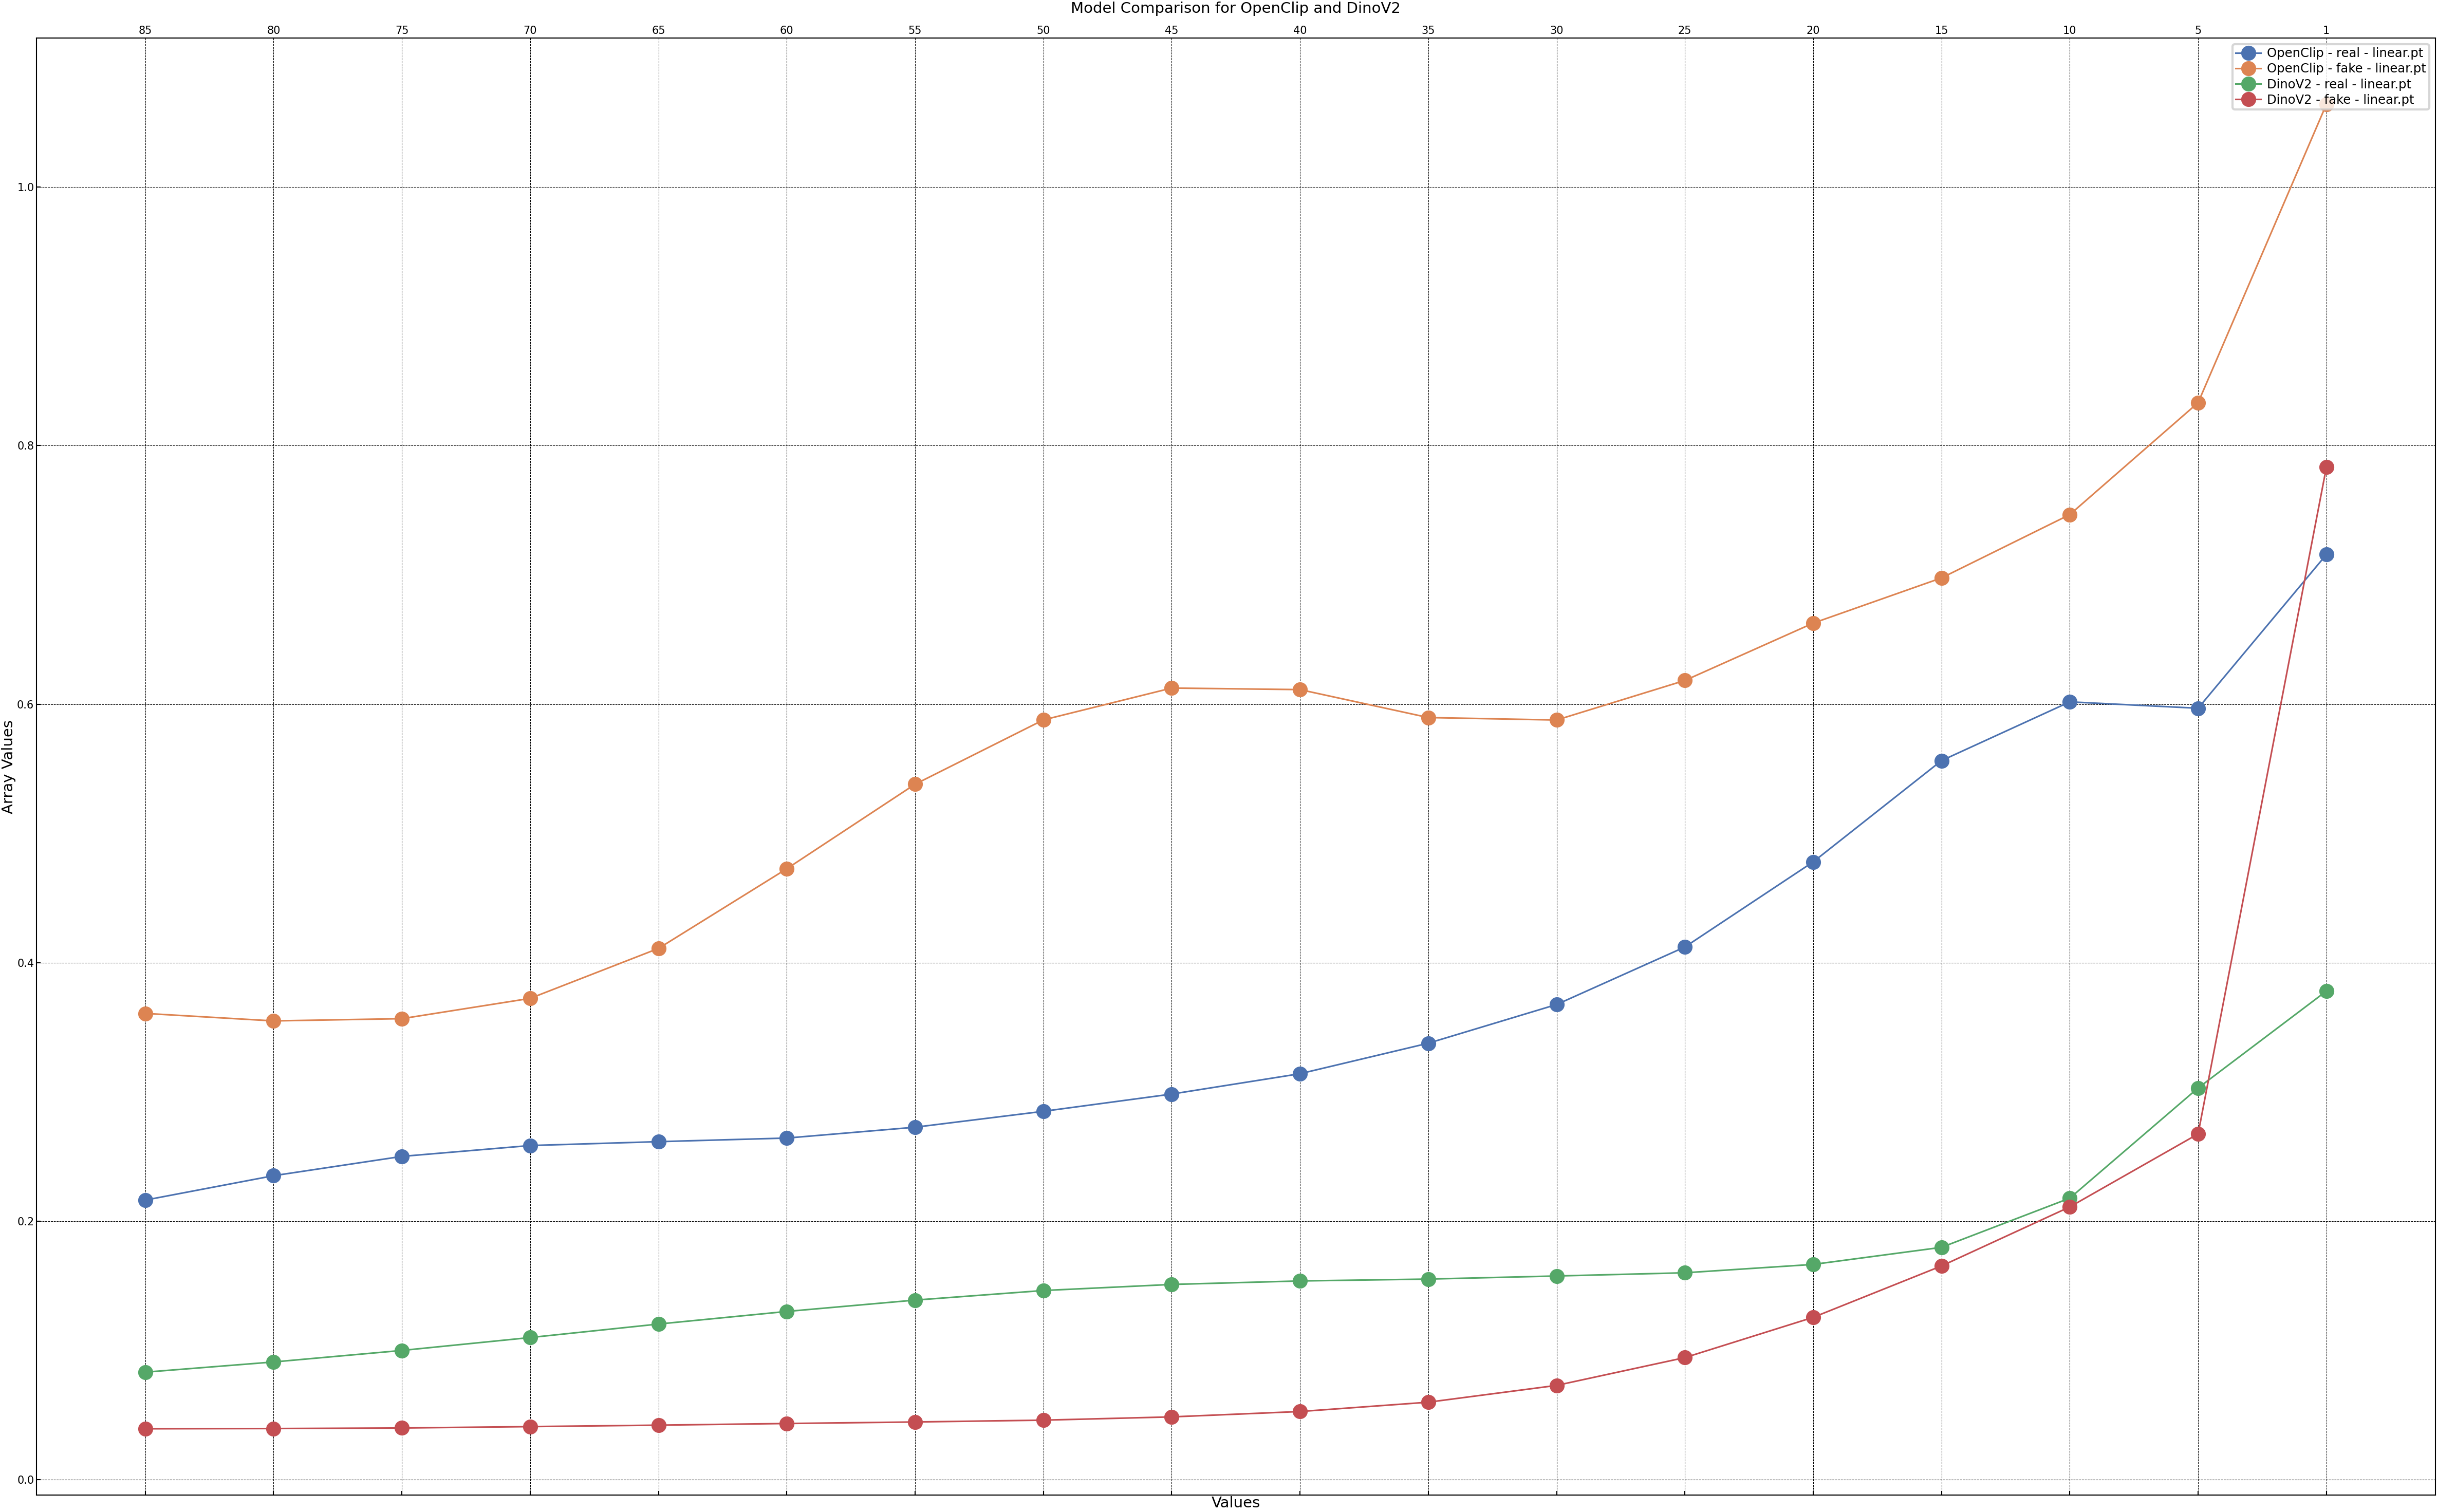

In [ ]:
labels_mapping = {
    "0.0": "Real",
    "1.0": "Fake"
}
data = experiemnts["butt_low_5_sup_con.pkl"]
sorted_keys = sorted([int(k) for k in data['0.0']['OpenClip']['no']['linear.pt'].keys()], reverse=True)
sorted_keys = [str(k) for k in sorted_keys]

labels =  sorted_keys

plt.figure(figsize=(16, 10))

# Plotting for 'OpenClip' Model
for model_name, label_name in [("0.0", "real"), ("1.0", "fake")]:
    values_linear_openclip = [data[model_name]['OpenClip']['no']['linear.pt'][key] for key in sorted_keys]
    values_encoder_openclip = [data[model_name]['OpenClip']['no']['encoder.pt'][key] for key in sorted_keys]
    plt.plot(labels, values_linear_openclip,'-o', label=f"OpenClip - {label_name} - linear.pt")
    #plt.plot(labels, values_encoder_openclip,'--*', label=f"OpenClip - {label_name} - encoder.pt")

# Plotting for 'DinoV2' Model
for model_name, label_name in [("0.0", "real"), ("1.0", "fake")]:
    values_linear_dinov2 = [data[model_name]['DinoV2']['no']['linear.pt'][key] for key in sorted_keys]
    values_encoder_dinov2 = [data[model_name]['DinoV2']['no']['encoder.pt'][key] for key in sorted_keys]
    plt.plot(labels, values_linear_dinov2,'-o', label=f"DinoV2 - {label_name} - linear.pt")
    #plt.plot(labels, values_encoder_dinov2,'--*', label=f"DinoV2 - {label_name} - encoder.pt")

plt.title('Model Comparison for OpenClip and DinoV2')
plt.xlabel('Values')
plt.ylabel('Array Values')
plt.legend(loc="upper right", fontsize='small')
plt.tight_layout()
plt.show()

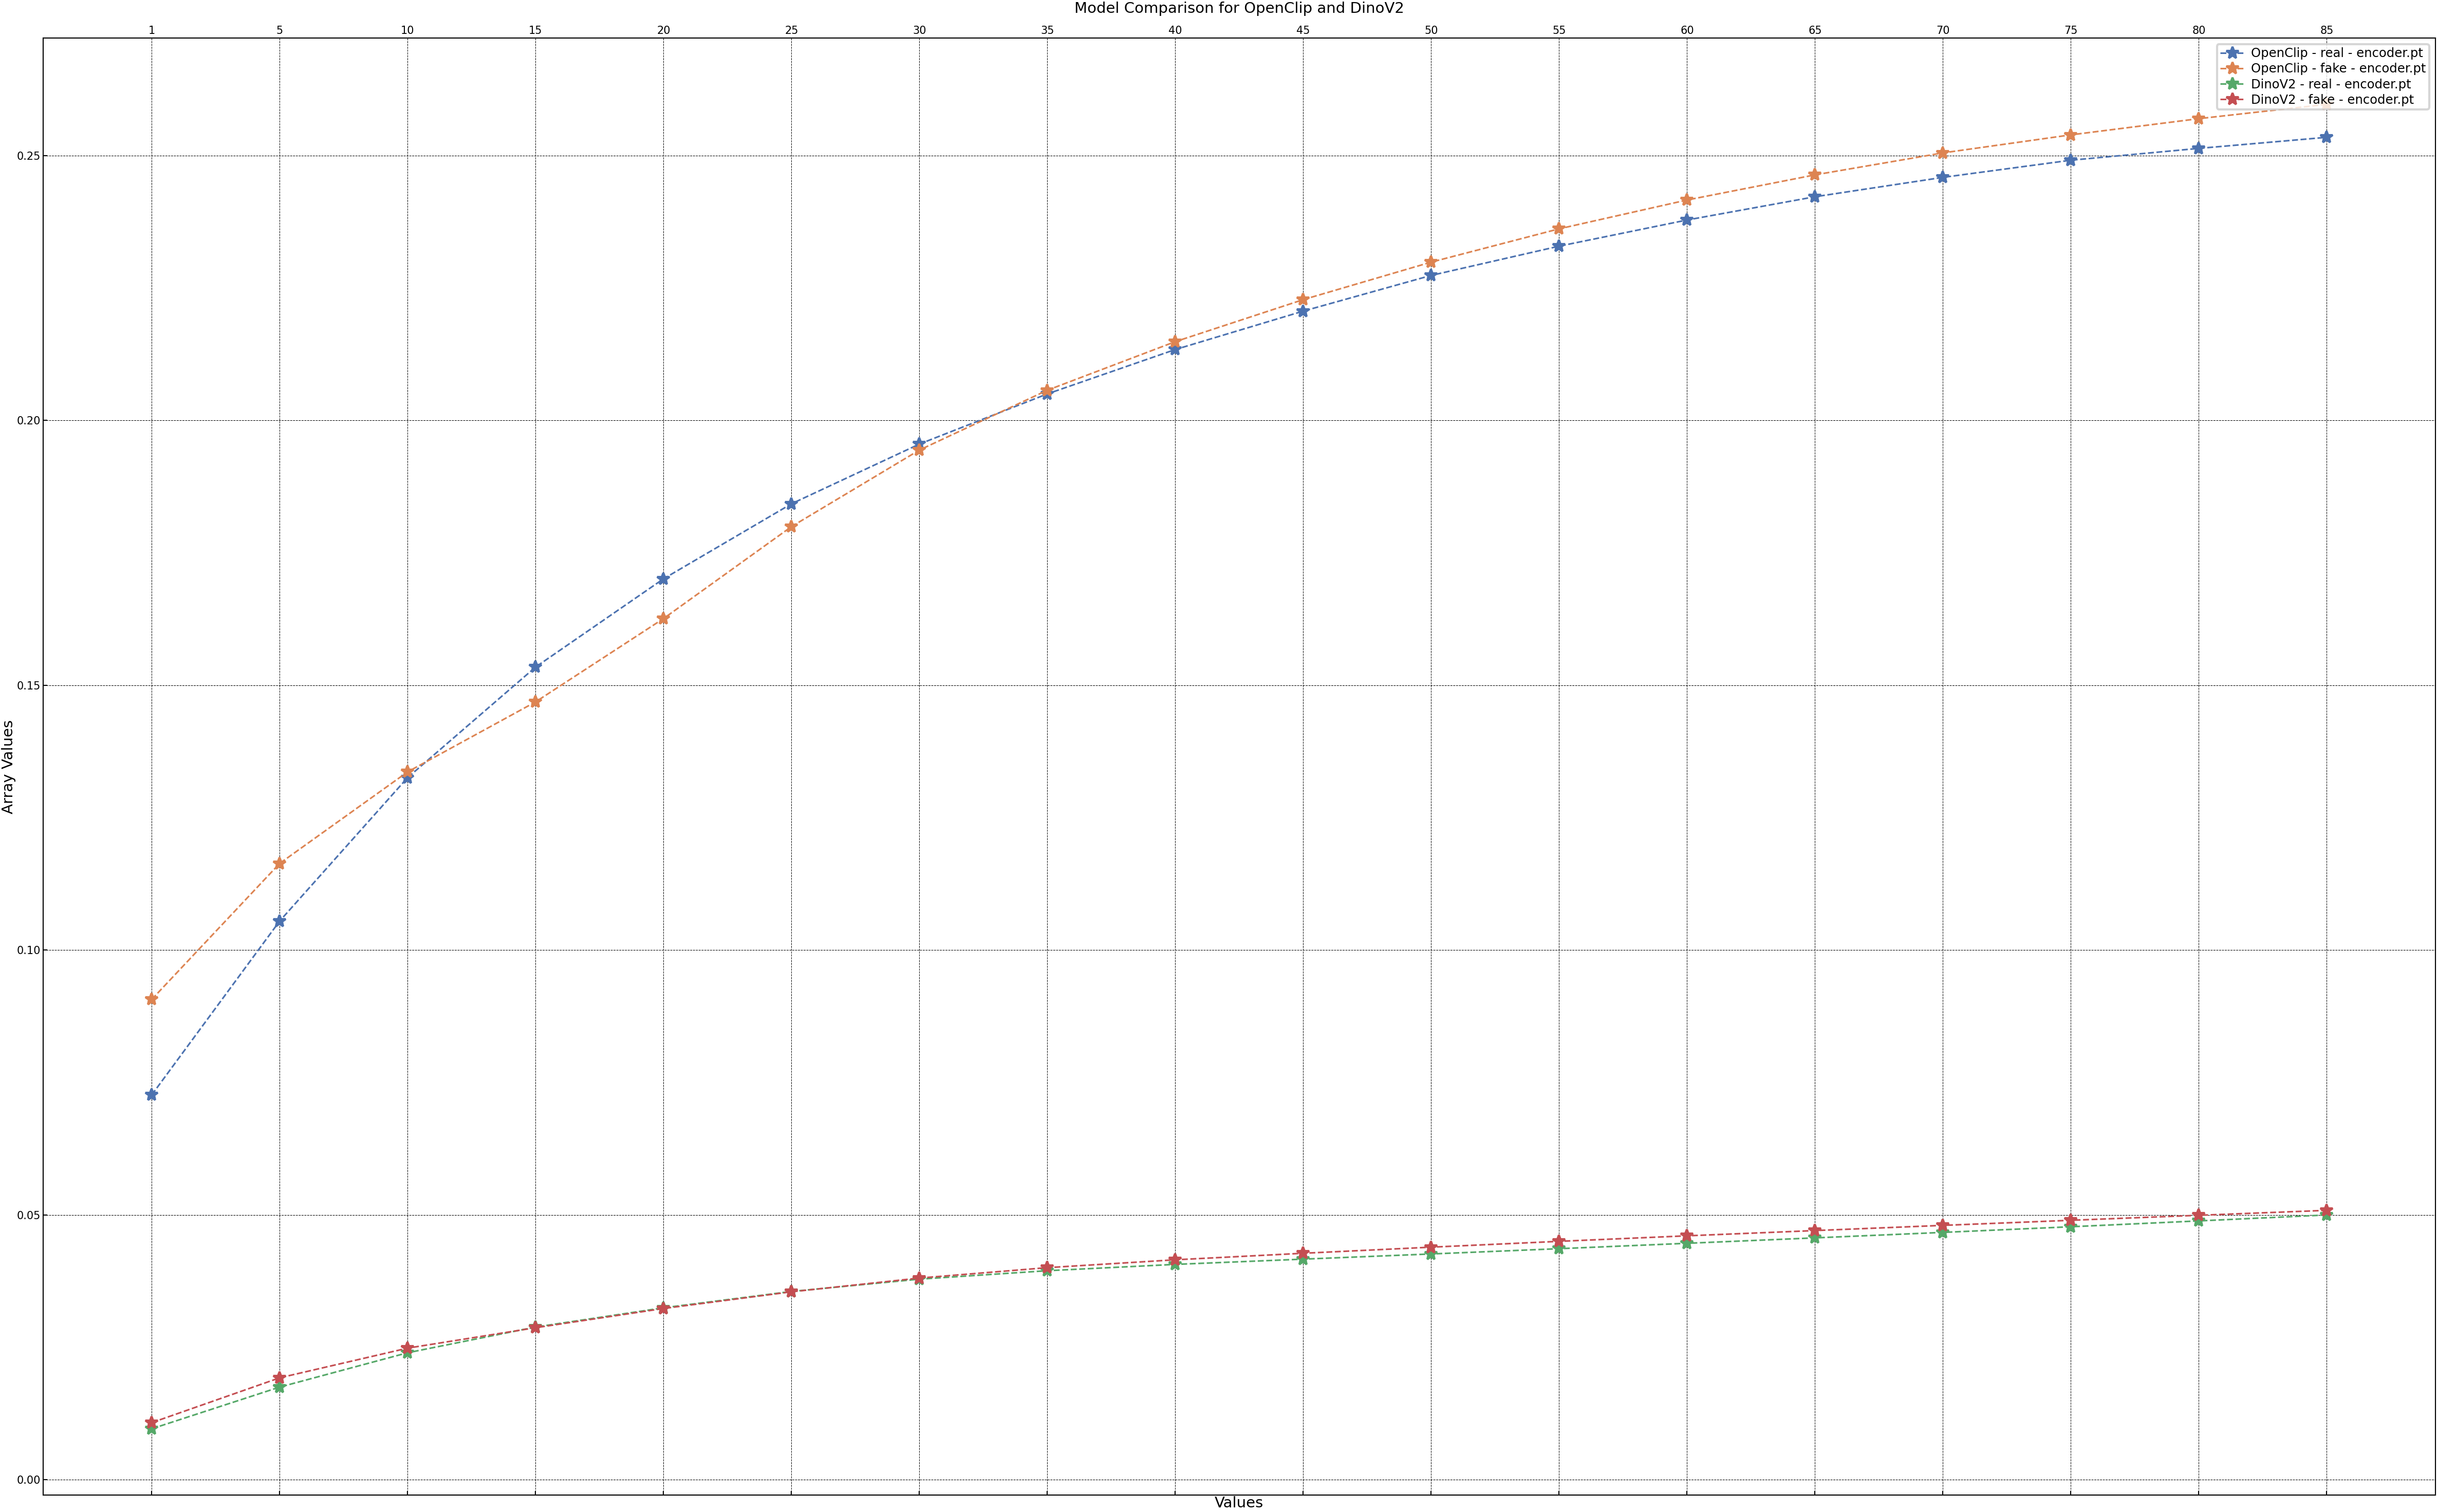

In [ ]:
labels_mapping = {
    "0.0": "Real",
    "1.0": "Fake"
}
data = experiemnts["butt_high_5_sup_con.pkl"]
sorted_keys = sorted([int(k) for k in data['0.0']['OpenClip']['no']['linear.pt'].keys()])
sorted_keys = [str(k) for k in sorted_keys]

labels =  sorted_keys

plt.figure(figsize=(16, 10))

# Plotting for 'OpenClip' Model
for model_name, label_name in [("0.0", "real"), ("1.0", "fake")]:
    values_linear_openclip = [data[model_name]['OpenClip']['no']['linear.pt'][key] for key in sorted_keys]
    values_encoder_openclip = [data[model_name]['OpenClip']['no']['encoder.pt'][key] for key in sorted_keys]
    #plt.plot(labels, values_linear_openclip,'-o', label=f"OpenClip - {label_name} - linear.pt")
    plt.plot(labels, values_encoder_openclip,'--*', label=f"OpenClip - {label_name} - encoder.pt")

# Plotting for 'DinoV2' Model
for model_name, label_name in [("0.0", "real"), ("1.0", "fake")]:
    values_linear_dinov2 = [data[model_name]['DinoV2']['no']['linear.pt'][key] for key in sorted_keys]
    values_encoder_dinov2 = [data[model_name]['DinoV2']['no']['encoder.pt'][key] for key in sorted_keys]
    #plt.plot(labels, values_linear_dinov2,'-o', label=f"DinoV2 - {label_name} - linear.pt")
    plt.plot(labels, values_encoder_dinov2,'--*', label=f"DinoV2 - {label_name} - encoder.pt")

plt.title('Model Comparison for OpenClip and DinoV2')
plt.xlabel('Values')
plt.ylabel('Array Values')
plt.legend(loc="upper right", fontsize='small')
plt.tight_layout()
plt.show()

In [47]:
## Sort the experiments.

sorted_dict = {}
experiemnts ={}
base_input_folder = "/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features"
mmds = get_files_from_directory(base_input_folder)
mmd = mmds["no_filter_vs_filter"]
print(mmd)

for file in  mmd:
    
    with open(file, "rb") as input_file:
        mmds_GANs = pickle.load(input_file)
    experiemnt_name = file.split("/")[-1]
    experiemnts[experiemnt_name] = mmds_GANs

data = experiemnts["butt_low_5_sup_con.pkl"]
print(data["0.0"]["DinoV2"])
for key, value in data.items():
    
    
    if key not in sorted_dict.keys():
        sorted_dict[key] = {}
        
        #sorted_dict[experiemnt_key][model_name] = value
    for model_name, value2 in value.items():
        if model_name not in sorted_dict[key].keys():
            sorted_dict[key][model_name] = {}
        sorted_dict[key][model_name] = {key:value for key,value in value2['no']['linear.pt']}
print(sorted_dict.keys())

['/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/no_filter_vs_filter/butt_high_5_sup_con.pkl', '/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/no_filter_vs_filter/supContrastive.pkl', '/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/no_filter_vs_filter/butt_low_5_sup_con.pkl']
{'no': {'encoder.pt': {'80': array(0.02898848, dtype=float32), '15': array(0.08844399, dtype=float32), '45': array(0.04806912, dtype=float32), '1': array(0.23805308, dtype=float32), '5': array(0.17547119, dtype=float32), '25': array(0.06410015, dtype=float32), '40': array(0.05044472, dtype=float32), '55': array(0.04400158, dtype=float32), '60': array(0.04142523, dtype=float32), '75': array(0.03206968, dtype=float32), '30': array(0.05759132, dtype=float32), '20': array(0.07396376, dtype=float32), '50': array(0.04611528, dtype=float32), '10': array(0.11811376, dtype=float32), '65': array(0.03844869, dtype=float32), '70': array(0.03521609, dtype=float32), '8

IndexError: list index out of range

How is the distribution between an unfiltered image and a filtered image for a real and a fake image?

{'linear.pt': {'45': array(0.29841083, dtype=float32), '25': array(0.41216987, dtype=float32), '15': array(0.5563323, dtype=float32), '35': array(0.33774692, dtype=float32), '60': array(0.2643795, dtype=float32), '10': array(0.6017748, dtype=float32), '80': array(0.23527074, dtype=float32), '85': array(0.21639276, dtype=float32), '75': array(0.25019318, dtype=float32), '5': array(0.5968559, dtype=float32), '50': array(0.28507233, dtype=float32), '65': array(0.26159573, dtype=float32), '40': array(0.31414646, dtype=float32), '55': array(0.27277017, dtype=float32), '20': array(0.47800452, dtype=float32), '70': array(0.25860238, dtype=float32), '1': array(0.7157452, dtype=float32), '30': array(0.3676753, dtype=float32)}, 'encoder.pt': {'45': array(0.15804803, dtype=float32), '40': array(0.16850233, dtype=float32), '60': array(0.13465202, dtype=float32), '30': array(0.19380593, dtype=float32), '20': array(0.22663248, dtype=float32), '25': array(0.20886135, dtype=float32), '55': array(0.140

TypeError: unhashable type: 'dict'

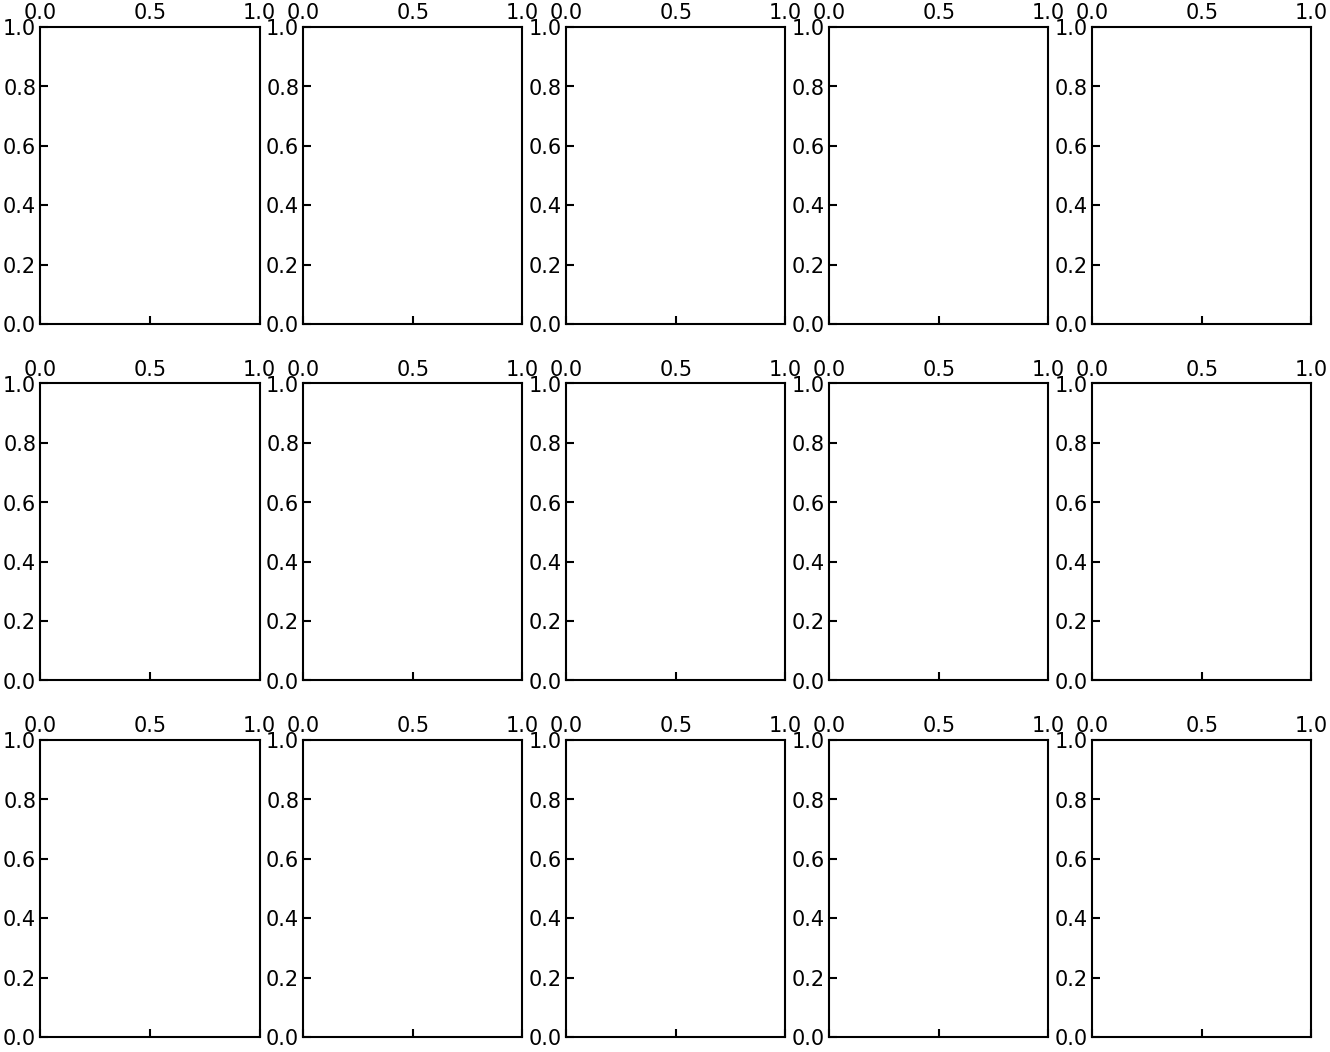

In [44]:


fig, axd = plt.subplot_mosaic(
    [[0,1,2,3,4],[5,6,7,8,9],[10,11,12,13,14]],
    # set the height ratios between the rows
    height_ratios=[1, 1, 1],
    # set the width ratios between the columns
    width_ratios=[1, 1, 1, 1, 1],
    constrained_layout=False,
    figsize=get_figsize(ratio=0.8),
    sharey=False,
    sharex=False
)


desired_order_list = ["real", "no", "01", "02", "03", "04", "05", "06", "07", "08","09"]

cm = plt.get_cmap('coolwarm')
# set global style for the axes
Clip_x_center = 0.1
DINO_x_center = -0.1
exp_name = "real_vs_fake"
my_xticks_pos = np.array([DINO_x_center, Clip_x_center])
my_xticks = ['DinoV2','OpenClip']

counter = 0

#exp_results = sorted_dict
#for i, results in enumerate(data.items()):
for exp_name in ["0.0","1.0"]:
    exp_results = sorted_dict[exp_name]
    ax = axd[counter]
    #exp_name, exp_results = results
    clip = exp_results["OpenClip"]                                                                                                             
    dino = exp_results["DinoV2"]
    for DM, MMD_DM in clip.items():
        # if DM not in [ "00","real","09"]:#, 
        #     continue
        print(MMD_DM)
        ax.scatter(Clip_x_center , MMD_DM, label=f'{DM}', alpha=0.9, zorder=4, color=cm((10 - desired_order_list.index(DM) + 5 )/ 10))
    # plot GAN values
    for GAN, MMD_GAN in dino.items():
        # if GAN not in ["00","real"]:# 
        #     continue
        ax.scatter(DINO_x_center, MMD_GAN, label=f'{GAN}', alpha=0.9, zorder=4, color=cm(desired_order_list.index(GAN) / 10))


    axd[counter].set_xlim(left=np.min(my_xticks_pos) * 2., right=np.max(my_xticks_pos) * 2.)
    axd[counter].set_ylim(bottom=0.0, top=1.0)
    ax.set_xticks(my_xticks_pos)
    ax.set_xticklabels(my_xticks)
    ax.set_title(exp_name,  loc="center")



    counter += 1
# handles, labels = fig.gca().get_legend_handles_labels()

# by_label = dict(zip(labels, handles))

# reordered_dict = {k: by_label[k] for k in desired_order_list}
# fig.legend(reordered_dict.values(), reordered_dict.keys(), ncol=2, borderpad=0.7,
#            bbox_to_anchor=(1.01, 0.55), labelspacing = 0.8, columnspacing=0.8)
plt.show()

## Now we want to see how the latent space behaves, when we compare the no filter images against the filtered images. For Fake and Real images.
Specifically we want to see, which model is more sensitive towards the manipulation of the frequency domain. 

In [25]:
experiemnts = {}
path_names = []
base_input_folder = "/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features"
mmds = get_files_from_directory(base_input_folder)
mmd = mmds["filter_vs_filter"]
print(mmd)
for file in  mmd:
    
    with open(file, "rb") as input_file:
        mmds_GANs = pickle.load(input_file)
    
    experiemnt_name = file.split("/")[-1]
    experiemnts[experiemnt_name] = mmds_GANs
print(experiemnts)
sorted_dict = {}

for key, value in experiemnts.items():
    print(key)
    experiemnt_key = key.split("_")[0]
    model_name = key.split("_")[1]
    if model_name not in sorted_dict.keys():
        sorted_dict[model_name] = {}
        
        #sorted_dict[experiemnt_key][model_name] = value
    sorted_dict[model_name][experiemnt_key] = value
print(sorted_dict.keys())
print(sorted_dict)


['/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/filter_vs_filter/1.0_OpenClip_real.pkl', '/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/filter_vs_filter/0.0_OpenClip_real.pkl', '/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/filter_vs_filter/0.0_DinoV2_real.pkl', '/home/wustl/Dummy/Wustl/Deepfake/MasterThesis/results/mmd_features/filter_vs_filter/1.0_DinoV2_real.pkl']
{'1.0_OpenClip_real.pkl': {'03': array(0.10920465, dtype=float32), '06': array(0.09685814, dtype=float32), '05': array(0.09921849, dtype=float32), '00': array(0.15576291, dtype=float32), '08': array(0.08696461, dtype=float32), '02': array(0.11856341, dtype=float32), '01': array(0.13037896, dtype=float32), '07': array(0.08858287, dtype=float32), '04': array(0.10326922, dtype=float32), '09': array(0.08852315, dtype=float32)}, '0.0_OpenClip_real.pkl': {'03': array(0.10415661, dtype=float32), '06': array(0.09052813, dtype=float32), '05': array(0.09427726, dtype=flo

{}


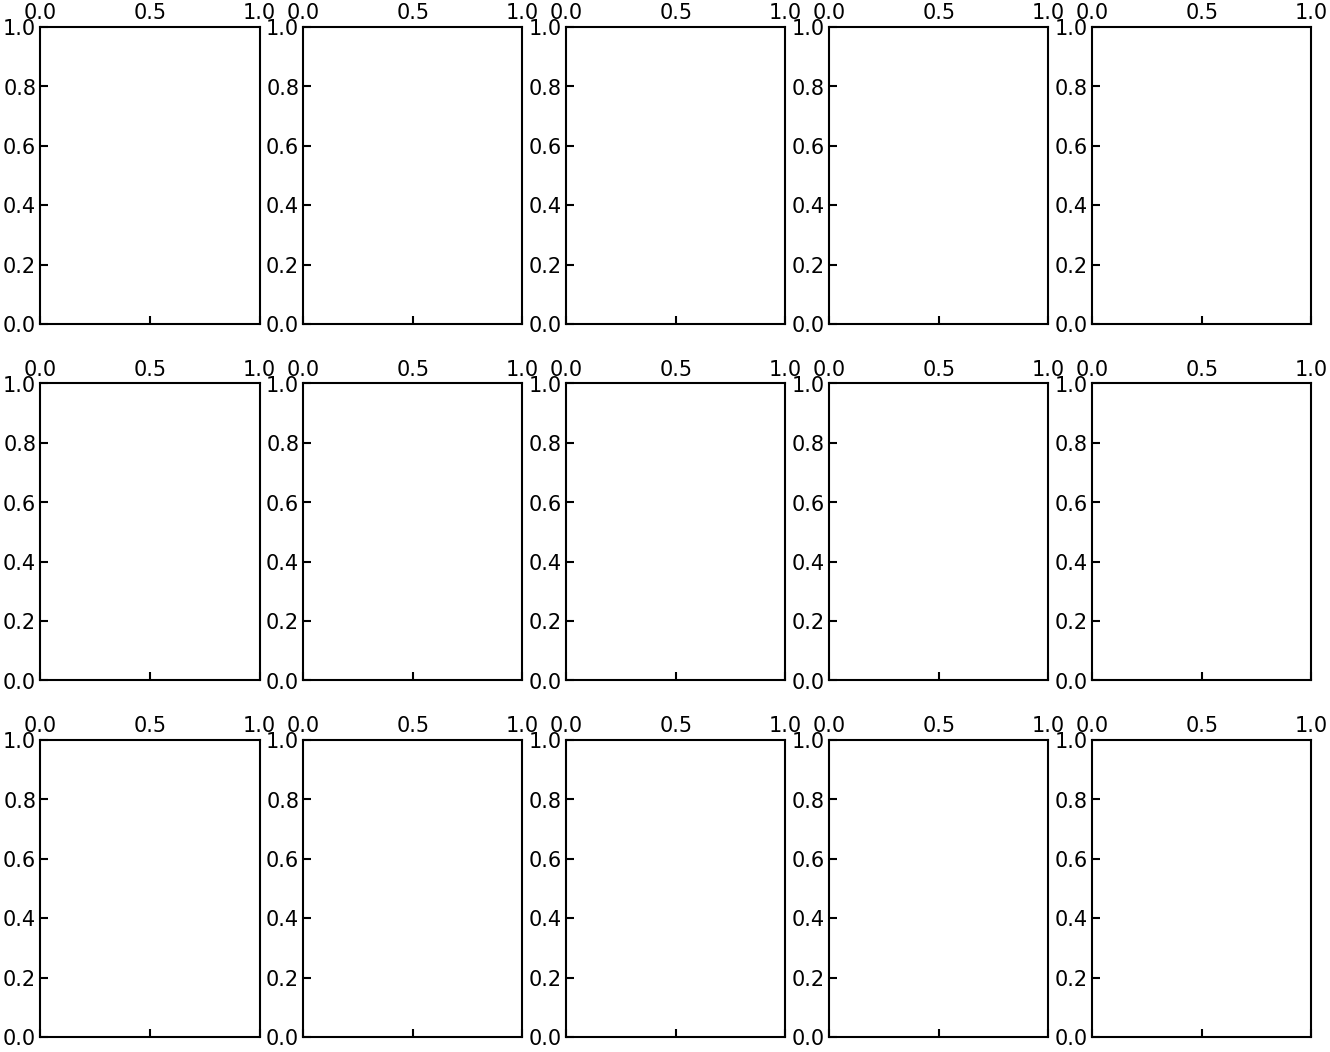

In [40]:
import matplotlib.pyplot as plt
import numpy as np

fig, axd = plt.subplot_mosaic(
    [[0,1,2,3,4],[5,6,7,8,9],[10,11,12,13,14]],
    # set the height ratios between the rows
    height_ratios=[1, 1, 1],
    # set the width ratios between the columns
    width_ratios=[1, 1, 1, 1, 1],
    constrained_layout=False,
    figsize=get_figsize(ratio=0.8),
    sharey=False,
    sharex=False
)

desired_order_list = ["real", "00", "01", "02", "03", "04", "05", "06", "07", "08","09"]

cm = plt.get_cmap('coolwarm')
# set global style for the axes
Clip_x_center = 0.1
DINO_x_center = -0.1
my_xticks_pos = np.array([DINO_x_center, Clip_x_center])
my_xticks = ['Real','Fake',]

counter = 0
print(sorted_dict)
for  exp_name, value in sorted_dict.items():
    exp_results = sorted_dict[exp_name]
    ax = axd[counter]
    #exp_name, exp_results = results
    print(exp_results)
    real = exp_results["0.0"]
    fake = exp_results["1.0"]
    ax.set_title(exp_name,  loc="center")

    for DM, MMD_DM in real.items():
        if DM not in ["00","01"]:
            continue
        ax.scatter(Clip_x_center , MMD_DM, label=f'{DM}', alpha=0.9, zorder=4, color=cm((10 - desired_order_list.index(DM) + 5 )/ 10))
    # plot GAN values
    for GAN, MMD_GAN in fake.items():
        if GAN not in ["00","01"]:
            continue
        ax.scatter(DINO_x_center, MMD_GAN, label=f'{GAN}', alpha=0.9, zorder=4, color=cm(desired_order_list.index(GAN) / 10))


    axd[counter].set_xlim(left=np.min(my_xticks_pos) * 2., right=np.max(my_xticks_pos) * 2.)


    axd[counter].set_ylim(bottom=0.0, top=0.3)
    ax.set_xticks(my_xticks_pos)
    ax.set_xticklabels(my_xticks)


    counter += 1
handles, labels = fig.gca().get_legend_handles_labels()

plt.show()